In [4]:
import yfinance as yf
import pandas as pd 
import numpy as npx
import seaborn as sns 
import matplotlib.pyplot as plt 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

2024-05-09 13:34:16.293680: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
import yfinance as yf
import pandas as pd

symbols_wig20 = [
    "ALR.WA", "ALE.WA", "BDX.WA", "CDR.WA", "CPS.WA", "DNP.WA", "JSW.WA",
    "KTY.WA", "KGH.WA", "KRU.WA", "LPP.WA", "MBK.WA", "OPL.WA", "PEO.WA",
    "PCO.WA", "PGE.WA", "PKN.WA", "PKO.WA", "PZU.WA", "SPL.WA"
]

data_frames = {}

for symbol in symbols_wig20:
    data = yf.download(symbol, start="2023-01-01", interval="5m")
    data_frames[symbol] = data['Close'] 

combined_data = pd.DataFrame(data_frames)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [6]:
df=combined_data.copy()

In [7]:
df.isnull().sum()

ALR.WA    0
ALE.WA    0
BDX.WA    0
CDR.WA    0
CPS.WA    0
DNP.WA    0
JSW.WA    0
KTY.WA    0
KGH.WA    0
KRU.WA    0
LPP.WA    0
MBK.WA    0
OPL.WA    0
PEO.WA    0
PCO.WA    0
PGE.WA    0
PKN.WA    0
PKO.WA    0
PZU.WA    0
SPL.WA    0
dtype: int64

In [8]:
df

ALR.WA     ALE.WA  BDX.WA      CDR.WA     CPS.WA      DNP.WA  \
Date                                                                           
2023-01-02   34.700001  25.440001   285.0  129.339996  17.799999  369.200012   
2023-01-03   38.389999  26.665001   293.0  129.000000  17.700001  359.399994   
2023-01-04   41.049999  27.000000   293.0  127.500000  18.040001  360.000000   
2023-01-05   41.720001  26.650000   282.5  132.559998  18.540001  352.799988   
2023-01-09   42.950001  28.660000   288.5  133.740005  19.090000  365.299988   
...                ...        ...     ...         ...        ...         ...   
2024-05-02  103.900002  34.200001   700.0  119.550003   9.978000  386.700012   
2024-05-06  107.400002  36.904999   722.5  124.099998  10.420000  396.100006   
2024-05-07  103.849998  36.209999   730.5  128.500000  10.495000  396.399994   
2024-05-08  101.750000  36.415001   728.5  131.800003  10.720000  399.299988   
2024-05-09   99.080002  36.845001   743.5  131.949997  11.275000  399.200012   

               JSW.WA  KTY.WA      KGH.WA      KRU.WA   LPP.WA      MBK.WA  \
Date                                                                         
2023-01-02  57.980000   474.5  127.650002  311.799988  10580.0  297.399994   
2023-01-03  55.000000   485.0  130.500000  315.000000  10990.0  322.200012   
2023-01-04  57.500000   478.5  132.500000  318.600006  10960.0  334.000000   
2023-01-05  56.520000   480.0  136.500000  319.799988  11190.0  336.399994   
2023-01-09  58.080002   476.0  148.100006  330.000000  11730.0  345.000000   
...               ...     ...         ...         ...      ...         ...   
2024-05-02  30.750000   839.5  139.949997  459.399994  15700.0  686.200012   
2024-05-06  31.920000   868.0  144.199997  472.799988  16530.0  705.000000   
2024-05-07  31.740000   867.0  143.800003  476.600006  16350.0  698.400024   
2024-05-08  31.590000   886.5  147.000000  461.200012  16610.0  696.200012   
2024-05-09  31.500000   884.5  146.300003  472.000000  17090.0  696.000000   

            OPL.WA      PEO.WA     PCO.WA  PGE.WA     PKN.WA     PKO.WA  \
Date                                                                      
2023-01-02   6.712   86.519997  40.259998   6.920  64.599998  30.270000   
2023-01-03   6.680   90.900002  40.040001   6.832  65.199997  31.760000   
2023-01-04   6.760   93.480003  40.139999   6.946  65.760002  32.669998   
2023-01-05   6.878   94.480003  41.139999   6.898  62.459999  33.189999   
2023-01-09   7.050   98.459999  41.520000   6.700  62.000000  34.430000   
...            ...         ...        ...     ...        ...        ...   
2024-05-02   7.950  167.399994  19.125000   6.180  66.129997  60.060001   
2024-05-06   8.138  172.000000  19.680000   6.246  67.860001  61.200001   
2024-05-07   8.076  171.800003  19.549999   6.574  67.320000  60.619999   
2024-05-08   8.044  172.000000  19.330000   6.700  67.849998  60.779999   
2024-05-09   8.160  172.449997  19.370001   6.790  68.150002  61.320000   

               PZU.WA      SPL.WA  
Date                               
2023-01-02  34.610001  256.000000  
2023-01-03  34.840000  268.600006  
2023-01-04  35.849998  282.799988  
2023-01-05  35.750000  287.000000  
2023-01-09  36.599998  295.799988  
...               ...         ...  
2024-05-02  51.639999  561.400024  
2024-05-06  53.180000  572.400024  
2024-05-07  53.220001  567.799988  
2024-05-08  53.400002  571.599976  
2024-05-09  53.759998  577.599976  

[339 rows x 20 columns]

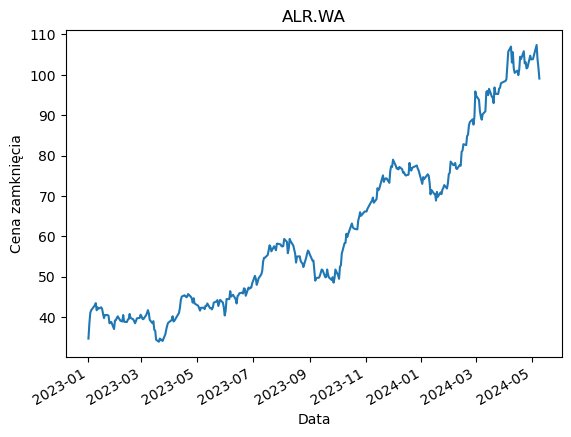

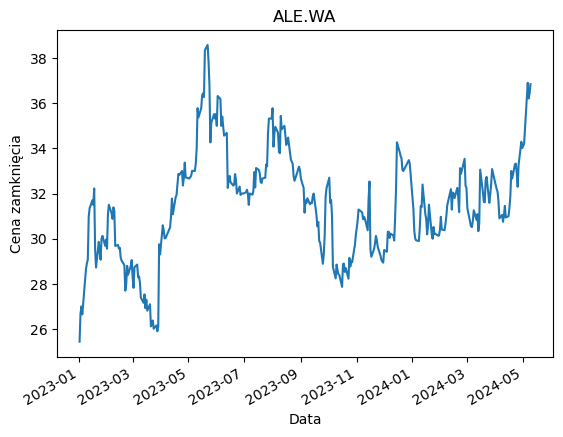

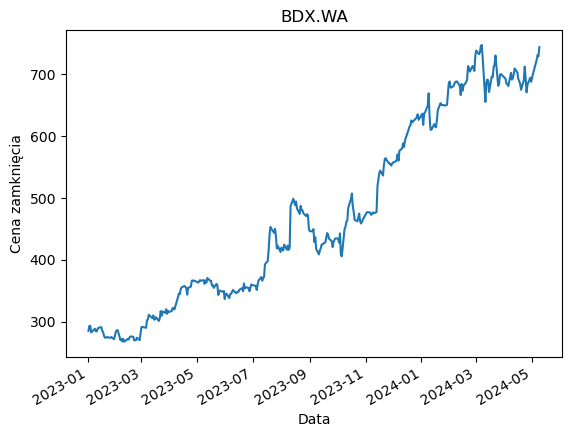

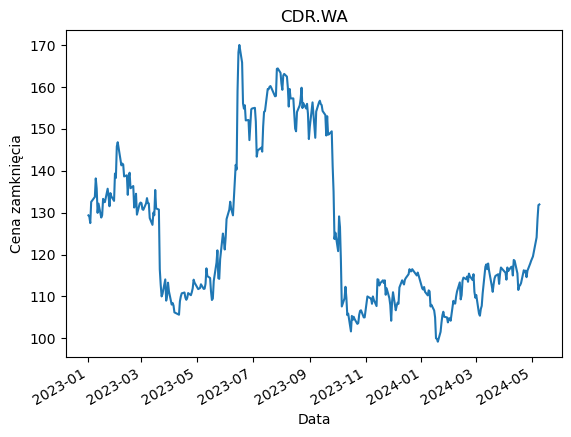

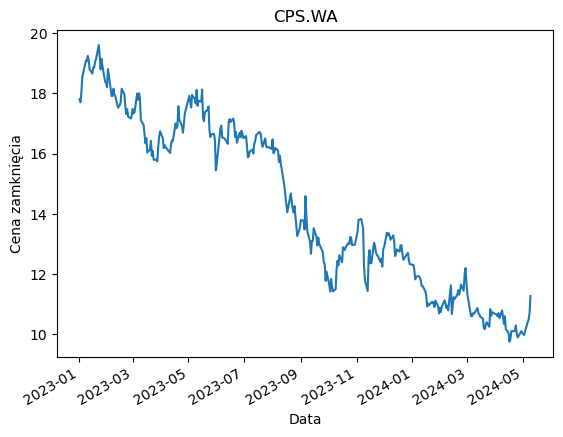

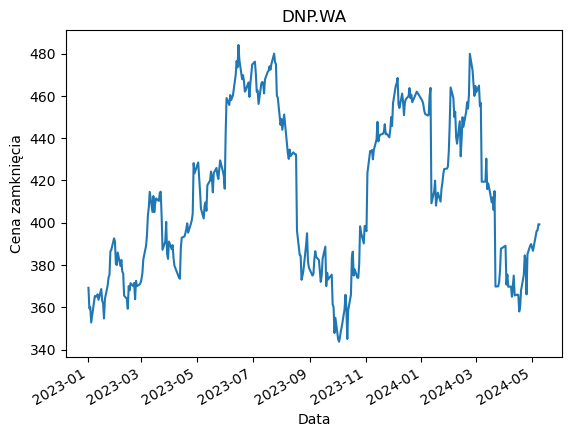

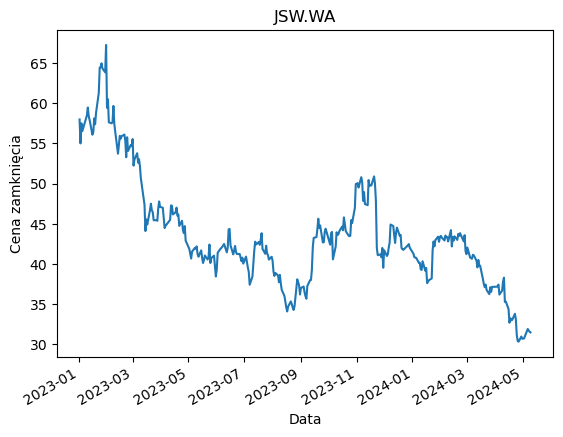

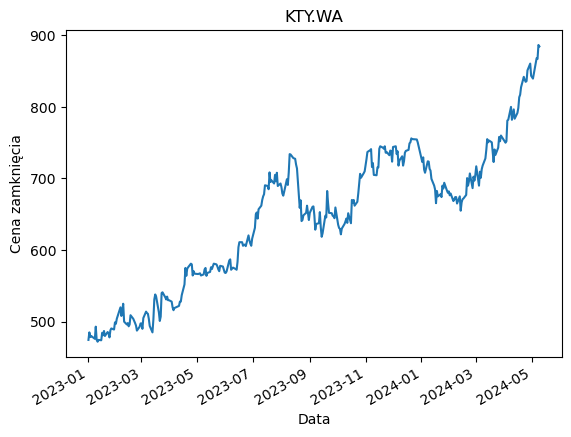

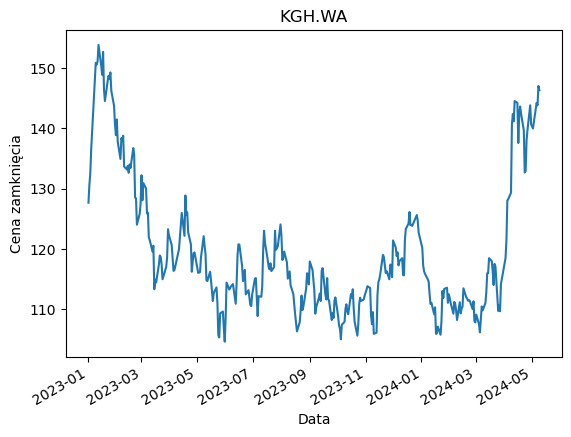

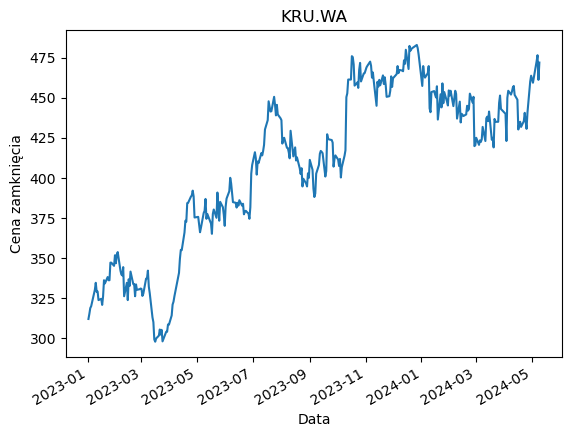

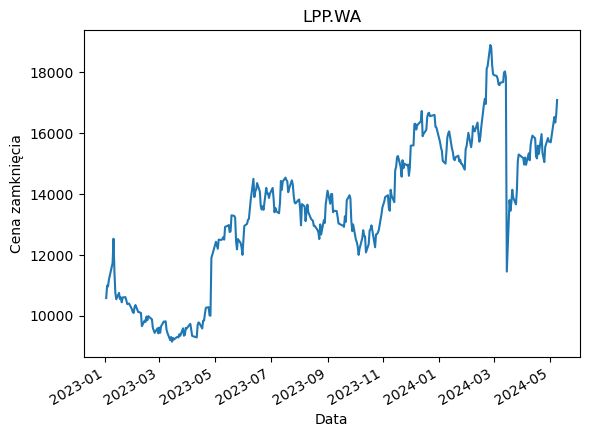

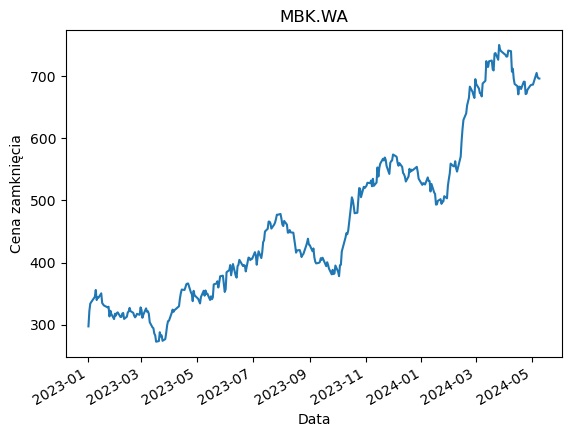

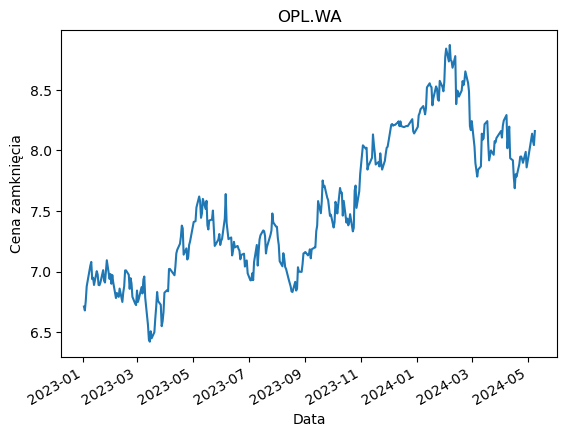

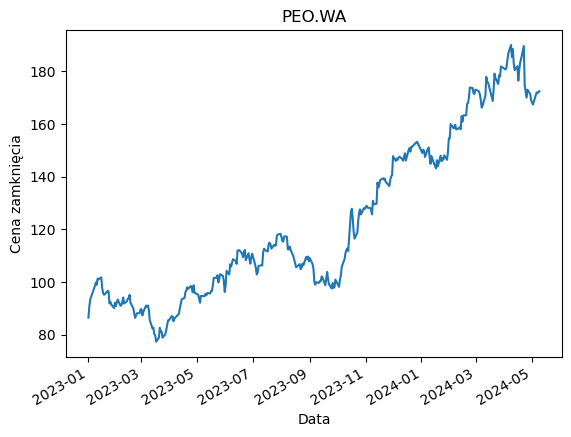

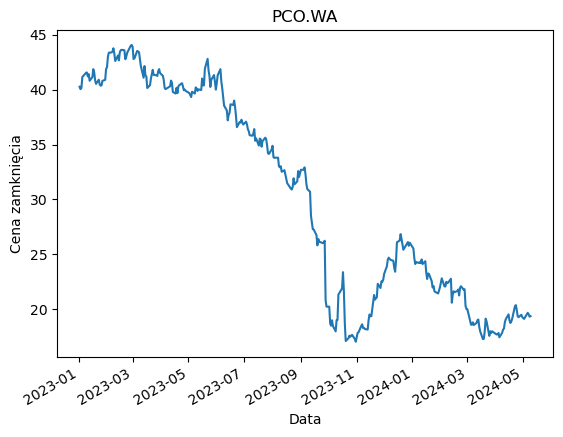

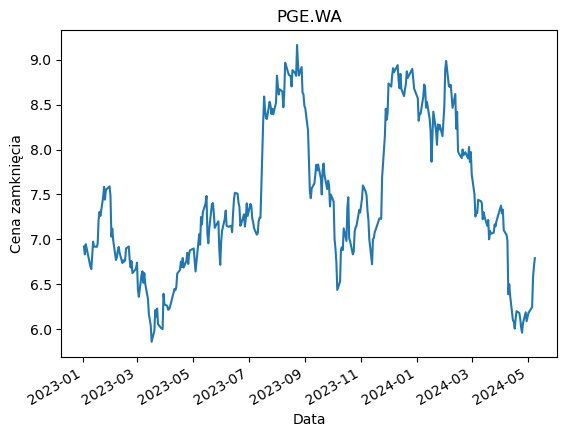

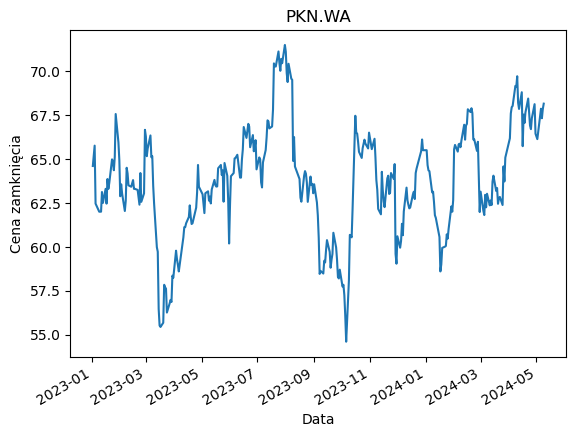

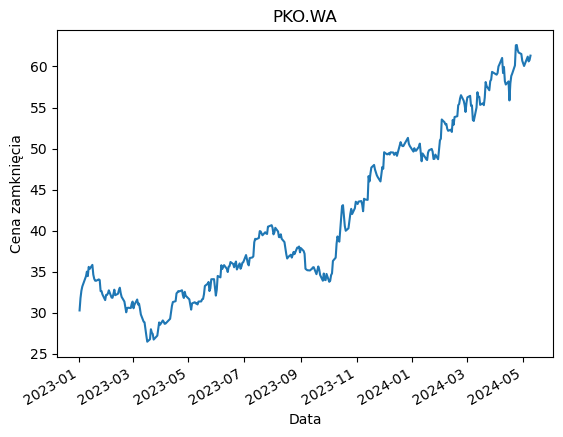

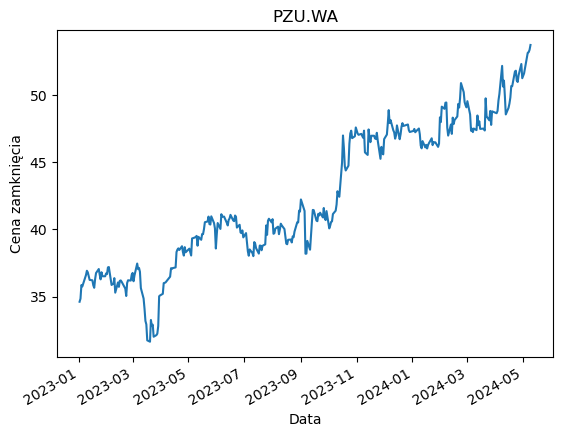

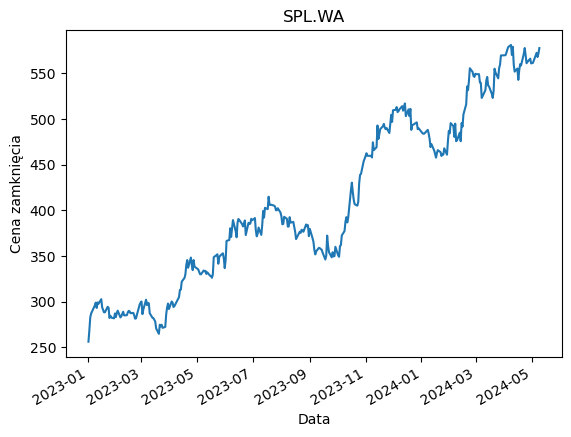

In [9]:
for i in df.columns:
    df[i].plot(title=i)
    plt.ylabel('Cena zamknięcia')
    plt.xlabel('Data')
    plt.show()

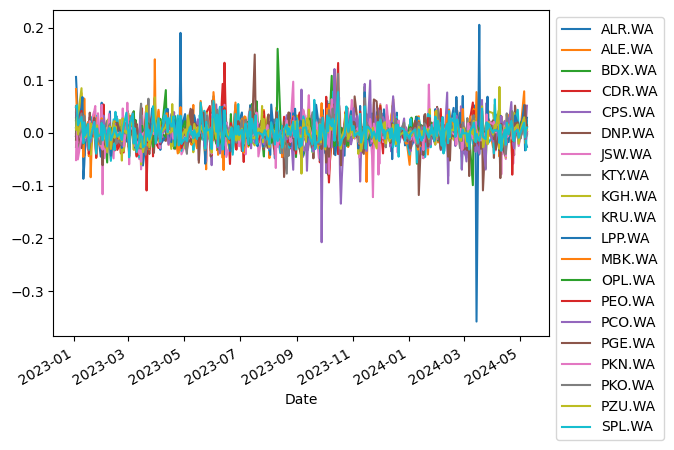

In [10]:
df.pct_change().plot()
plt.legend(loc='upper left', bbox_to_anchor=(1,1))

/home/bartosz/anaconda3/envs/naurelion/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/bartosz/anaconda3/envs/naurelion/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/bartosz/anaconda3/envs/naurelion/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/bartosz/anaconda3/envs/naurelion/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na opti

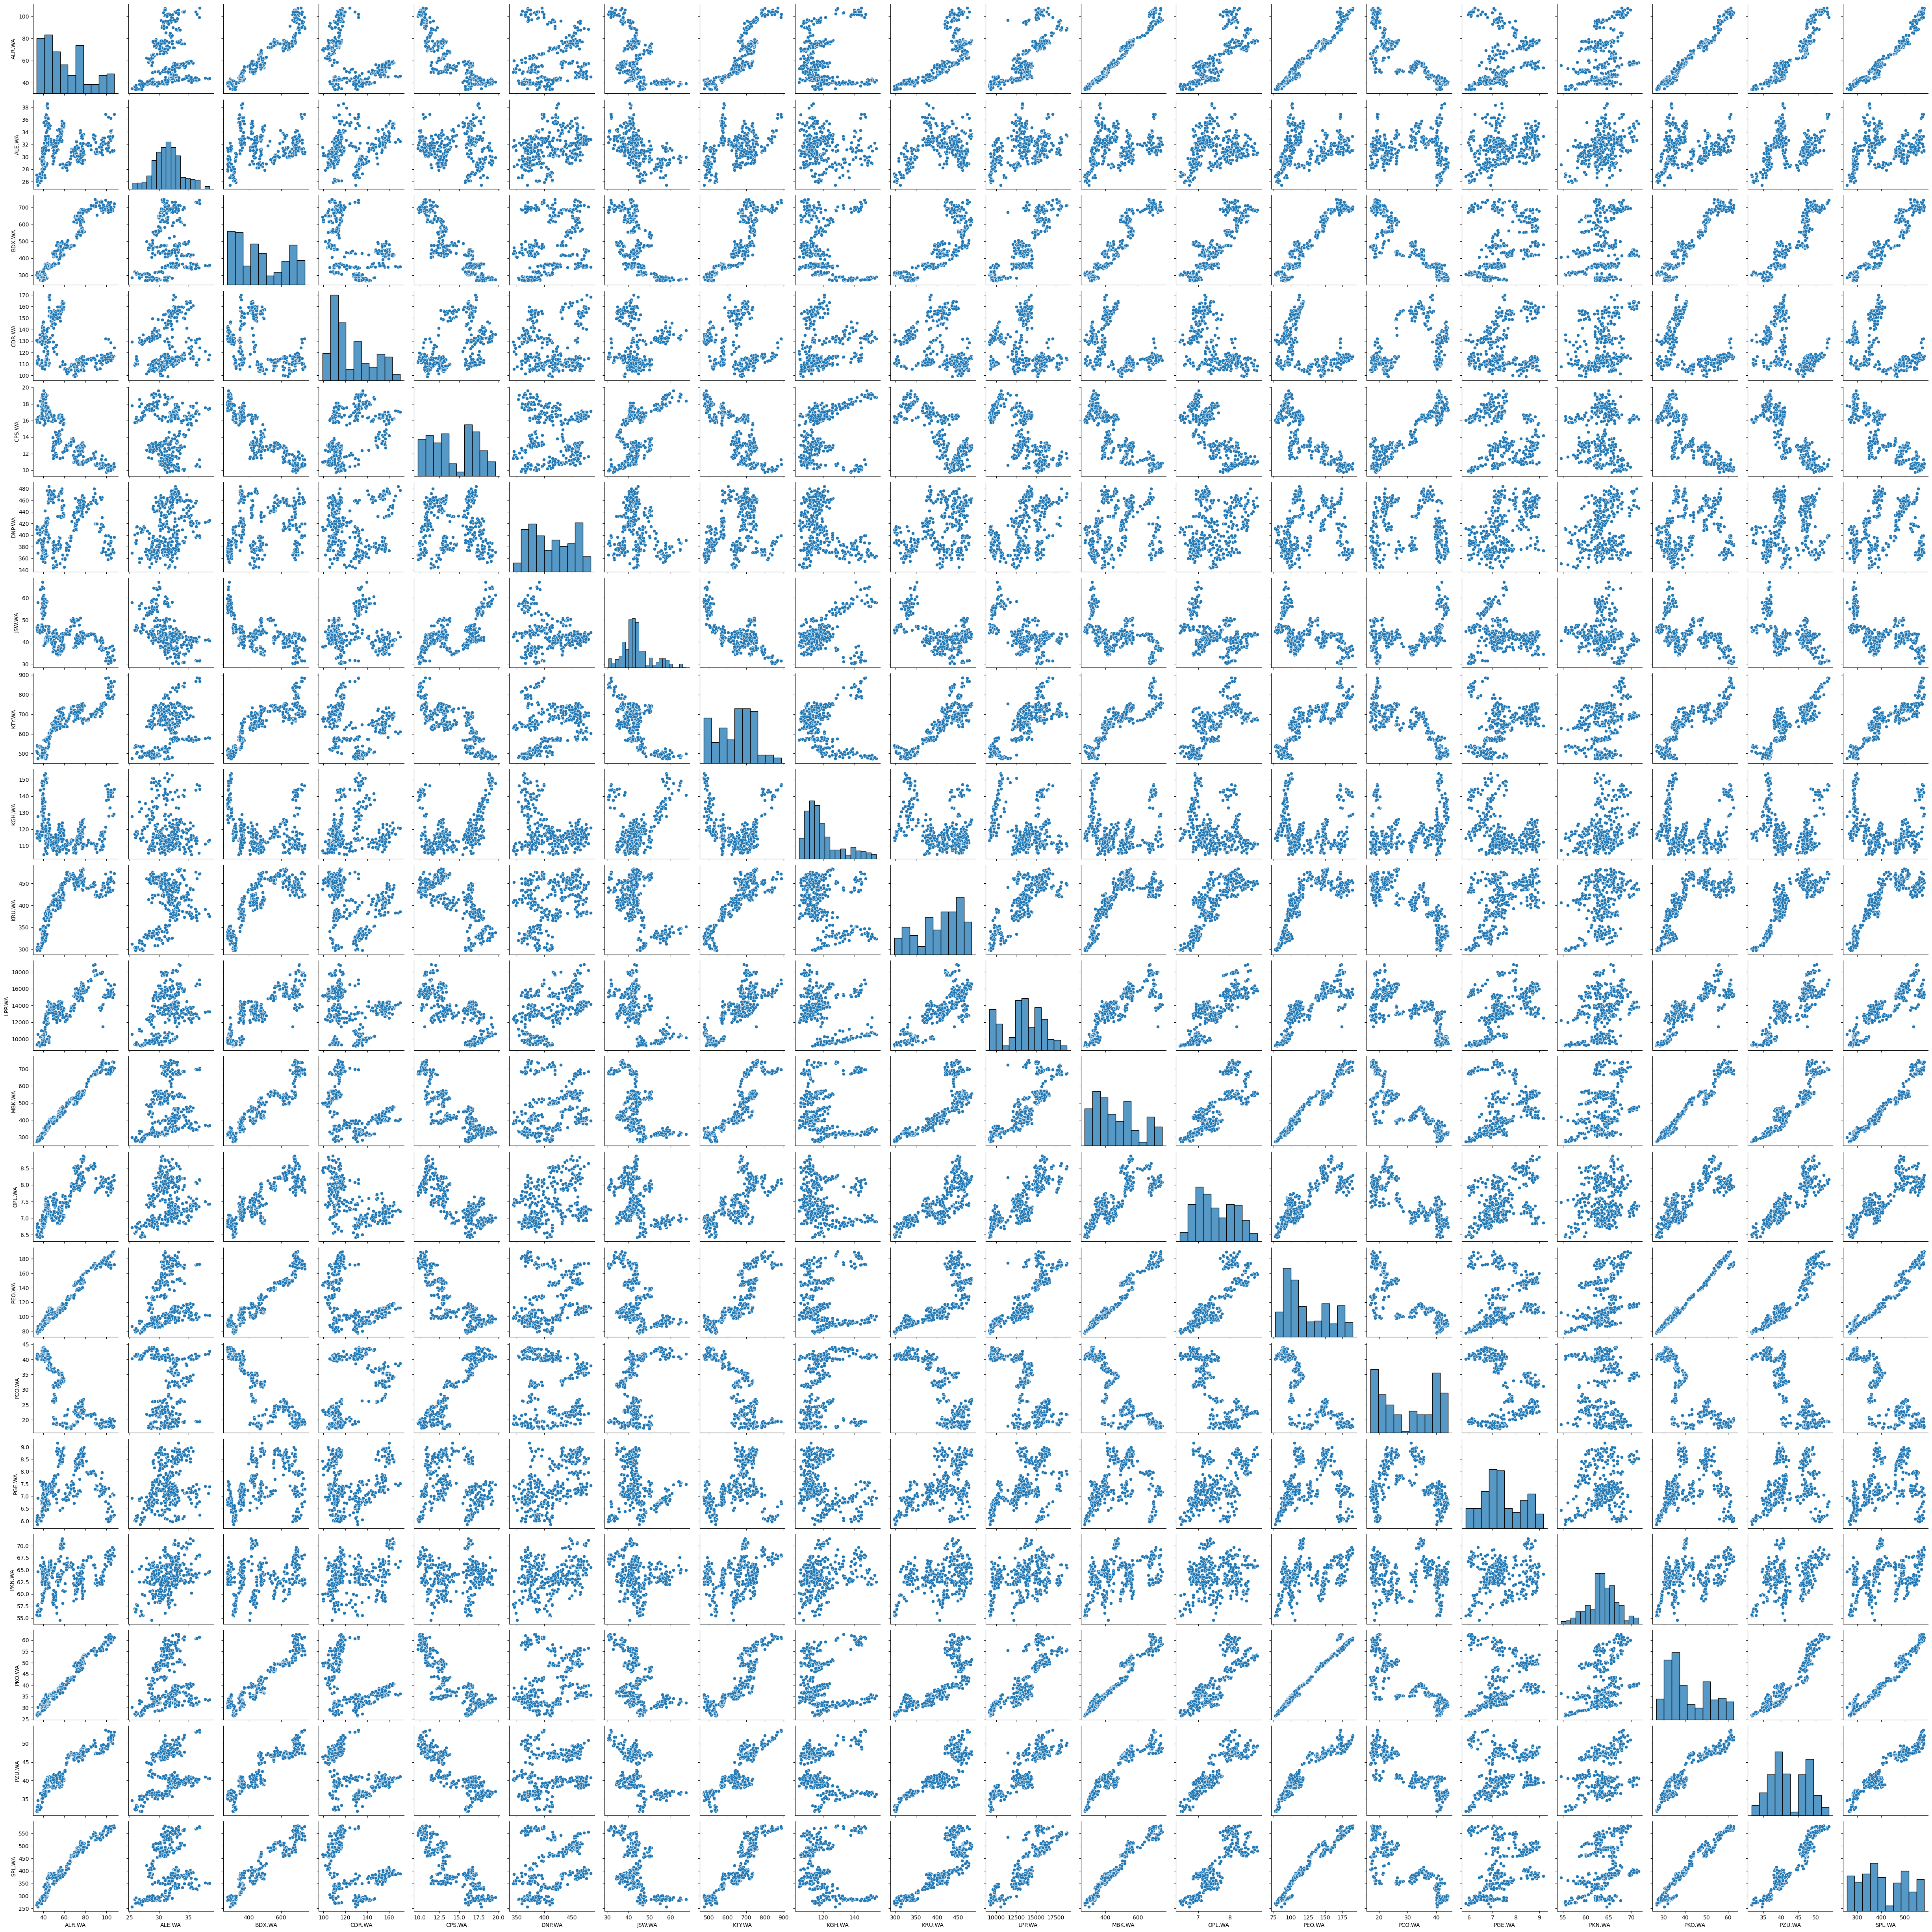

In [11]:
sns.pairplot(df)

In [11]:
'''sequence_length = 10  # Długość sekwencji dla LSTM

# Skalowanie danych
scaler = MinMaxScaler(feature_range=(0, 1))

# Słownik na modele
models = {}

# Iteracja po kolumnach w df, każda kolumna to seria czasowa dla jednej spółki
for symbol in df.columns:
    data = df[[symbol]].values  # Wybieramy dane dla jednej spółki
    scaled_data = scaler.fit_transform(data)  # Skalowanie danych
    
    # Generator sekwencji czasowych
    generator = TimeseriesGenerator(scaled_data, scaled_data,
                                    length=sequence_length, batch_size=1)
    
    # Budowanie modelu LSTM dla spółki
    model = Sequential([
        LSTM(50, activation='relu', input_shape=(sequence_length, 1)),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    # Trenowanie modelu
    model.fit(generator, epochs=20)
    
    # Zapisujemy model
    models[symbol] = model
    '''

"sequence_length = 10  # Długość sekwencji dla LSTM\n\n# Skalowanie danych\nscaler = MinMaxScaler(feature_range=(0, 1))\n\n# Słownik na modele\nmodels = {}\n\n# Iteracja po kolumnach w df, każda kolumna to seria czasowa dla jednej spółki\nfor symbol in df.columns:\n    data = df[[symbol]].values  # Wybieramy dane dla jednej spółki\n    scaled_data = scaler.fit_transform(data)  # Skalowanie danych\n    \n    # Generator sekwencji czasowych\n    generator = TimeseriesGenerator(scaled_data, scaled_data,\n                                    length=sequence_length, batch_size=1)\n    \n    # Budowanie modelu LSTM dla spółki\n    model = Sequential([\n        LSTM(50, activation='relu', input_shape=(sequence_length, 1)),\n        Dense(1)\n    ])\n    model.compile(optimizer='adam', loss='mean_squared_error')\n    \n    # Trenowanie modelu\n    model.fit(generator, epochs=20)\n    \n    # Zapisujemy model\n    models[symbol] = model\n    "

In [14]:
import numpy as np
import pandas as pd
import yfinance as yf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# Załóżmy, że mamy już wcześniej załadowany DataFrame `df` ze spółkami z WIG20
# df = pd.read_csv('ścieżka_do_pliku.csv', index_col='Date', parse_dates=True)

# Przygotowanie danych
sequence_length = 10  # Długość sekwencji dla LSTM
train_size = int(len(df) * 0.8)  # 80% danych na trening

# Skalowanie danych
scaler = MinMaxScaler(feature_range=(0, 1))

# Słownik na modele
models = {}

# Iteracja po kolumnach w df, każda kolumna to seria czasowa dla jednej spółki
for symbol in df.columns:
    data = df[[symbol]].values  # Wybieramy dane dla jednej spółki
    scaled_data = scaler.fit_transform(data)  # Skalowanie danych
    
    # Podział na dane treningowe i testowe
    train_data = scaled_data[:train_size]
    test_data = scaled_data[train_size - sequence_length:]  # Zachowanie nakładania się dla sekwencji
    
    # Generatory sekwencji dla treningu i testu
    train_generator = TimeseriesGenerator(train_data, train_data,
                                          length=sequence_length, batch_size=1)
    test_generator = TimeseriesGenerator(test_data, test_data,
                                         length=sequence_length, batch_size=1)
    
    # Budowanie modelu LSTM dla spółki
    model = Sequential([
        LSTM(100, activation='elu', input_shape=(sequence_length, 1), return_sequences=True),
        LSTM(50, activation='elu'),
        Dense(1)
    ])
    model.compile(optimizer='nadam', loss='mean_squared_error')
    
    # Trenowanie modelu
    model.fit(train_generator, epochs=20, validation_data=test_generator)
    
    # Zapisujemy model
    models[symbol] = model

# Teraz models[symbol] zawiera wytrenowany model dla każdej spółki


Epoch 1/20


2024-05-09 13:46:59.765463: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


257/261 [============================>.] - ETA: 0s - loss: 0.0044

2024-05-09 13:47:07.381641: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


261/261 [==============================] - 8s 16ms/step - loss: 0.0043 - val_loss: 0.0130
Epoch 2/20
261/261 [==============================] - 3s 13ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 3/20
261/261 [==============================] - 3s 13ms/step - loss: 0.0013 - val_loss: 0.0086
Epoch 4/20
261/261 [==============================] - 3s 13ms/step - loss: 0.0011 - val_loss: 0.0055
Epoch 5/20
261/261 [==============================] - 4s 13ms/step - loss: 0.0010 - val_loss: 0.0053
Epoch 6/20
261/261 [==============================] - 3s 13ms/step - loss: 9.0878e-04 - val_loss: 0.0017
Epoch 7/20
261/261 [==============================] - 3s 13ms/step - loss: 8.0989e-04 - val_loss: 0.0200
Epoch 8/20
261/261 [==============================] - 4s 14ms/step - loss: 6.7168e-04 - val_loss: 0.0011
Epoch 9/20
261/261 [==============================] - 3s 13ms/step - loss: 5.9717e-04 - val_loss: 0.0021
Epoch 10/20
261/261 [==============================] - 4s 14ms/step - loss: 6.0556e-04

2024-05-09 13:48:16.544132: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


260/261 [============================>.] - ETA: 0s - loss: 0.0189

2024-05-09 13:48:23.373417: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


261/261 [==============================] - 8s 16ms/step - loss: 0.0189 - val_loss: 0.0109
Epoch 2/20
261/261 [==============================] - 4s 14ms/step - loss: 0.0102 - val_loss: 0.0058
Epoch 3/20
261/261 [==============================] - 4s 14ms/step - loss: 0.0080 - val_loss: 0.0117
Epoch 4/20
261/261 [==============================] - 4s 14ms/step - loss: 0.0067 - val_loss: 0.0044
Epoch 5/20
261/261 [==============================] - 4s 14ms/step - loss: 0.0056 - val_loss: 0.0032
Epoch 6/20
261/261 [==============================] - 4s 15ms/step - loss: 0.0050 - val_loss: 0.0045
Epoch 7/20
261/261 [==============================] - 4s 15ms/step - loss: 0.0043 - val_loss: 0.0041
Epoch 8/20
261/261 [==============================] - 4s 15ms/step - loss: 0.0042 - val_loss: 0.0034
Epoch 9/20
261/261 [==============================] - 4s 14ms/step - loss: 0.0040 - val_loss: 0.0053
Epoch 10/20
261/261 [==============================] - 4s 14ms/step - loss: 0.0039 - val_loss: 0.0031


2024-05-09 13:49:35.156960: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


260/261 [============================>.] - ETA: 0s - loss: 0.0052

2024-05-09 13:49:42.216323: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


261/261 [==============================] - 8s 16ms/step - loss: 0.0051 - val_loss: 0.0112
Epoch 2/20
261/261 [==============================] - 4s 14ms/step - loss: 0.0027 - val_loss: 0.0052
Epoch 3/20
261/261 [==============================] - 4s 14ms/step - loss: 0.0022 - val_loss: 0.0020
Epoch 4/20
261/261 [==============================] - 4s 13ms/step - loss: 0.0018 - val_loss: 0.0019
Epoch 5/20
261/261 [==============================] - 4s 14ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 6/20
261/261 [==============================] - 4s 13ms/step - loss: 0.0015 - val_loss: 0.0091
Epoch 7/20
261/261 [==============================] - 4s 14ms/step - loss: 0.0017 - val_loss: 0.0031
Epoch 8/20
261/261 [==============================] - 4s 14ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 9/20
261/261 [==============================] - 4s 14ms/step - loss: 0.0011 - val_loss: 0.0028
Epoch 10/20
261/261 [==============================] - 4s 14ms/step - loss: 0.0012 - val_loss: 0.0021


2024-05-09 13:50:52.355313: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


259/261 [============================>.] - ETA: 0s - loss: 0.0159

2024-05-09 13:50:59.474095: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


261/261 [==============================] - 8s 16ms/step - loss: 0.0158 - val_loss: 0.0041
Epoch 2/20
261/261 [==============================] - 4s 15ms/step - loss: 0.0105 - val_loss: 0.0034
Epoch 3/20
261/261 [==============================] - 4s 16ms/step - loss: 0.0073 - val_loss: 0.0022
Epoch 4/20
261/261 [==============================] - 4s 14ms/step - loss: 0.0063 - val_loss: 0.0024
Epoch 5/20
261/261 [==============================] - 4s 14ms/step - loss: 0.0048 - val_loss: 0.0018
Epoch 6/20
261/261 [==============================] - 4s 14ms/step - loss: 0.0043 - val_loss: 0.0015
Epoch 7/20
261/261 [==============================] - 4s 14ms/step - loss: 0.0039 - val_loss: 0.0023
Epoch 8/20
261/261 [==============================] - 4s 14ms/step - loss: 0.0034 - val_loss: 0.0013
Epoch 9/20
261/261 [==============================] - 4s 15ms/step - loss: 0.0029 - val_loss: 0.0015
Epoch 10/20
261/261 [==============================] - 4s 15ms/step - loss: 0.0033 - val_loss: 0.0011


2024-05-09 13:52:11.629986: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


258/261 [============================>.] - ETA: 0s - loss: 0.0120

2024-05-09 13:52:18.613612: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


261/261 [==============================] - 8s 16ms/step - loss: 0.0120 - val_loss: 0.0018
Epoch 2/20
261/261 [==============================] - 4s 14ms/step - loss: 0.0042 - val_loss: 0.0048
Epoch 3/20
261/261 [==============================] - 4s 15ms/step - loss: 0.0036 - val_loss: 0.0018
Epoch 4/20
261/261 [==============================] - 4s 14ms/step - loss: 0.0038 - val_loss: 0.0021
Epoch 5/20
261/261 [==============================] - 4s 14ms/step - loss: 0.0031 - val_loss: 0.0014
Epoch 6/20
261/261 [==============================] - 4s 14ms/step - loss: 0.0028 - val_loss: 0.0013
Epoch 7/20
261/261 [==============================] - 4s 14ms/step - loss: 0.0026 - val_loss: 0.0013
Epoch 8/20
261/261 [==============================] - 4s 14ms/step - loss: 0.0025 - val_loss: 0.0020
Epoch 9/20
261/261 [==============================] - 4s 15ms/step - loss: 0.0021 - val_loss: 0.0012
Epoch 10/20
261/261 [==============================] - 4s 14ms/step - loss: 0.0020 - val_loss: 0.0010


2024-05-09 13:53:31.016513: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


261/261 [==============================] - ETA: 0s - loss: 0.0254

2024-05-09 13:53:38.019142: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


261/261 [==============================] - 8s 15ms/step - loss: 0.0254 - val_loss: 0.0223
Epoch 2/20
261/261 [==============================] - 4s 14ms/step - loss: 0.0123 - val_loss: 0.0165
Epoch 3/20
261/261 [==============================] - 4s 14ms/step - loss: 0.0099 - val_loss: 0.0125
Epoch 4/20
261/261 [==============================] - 4s 15ms/step - loss: 0.0079 - val_loss: 0.0080
Epoch 5/20
261/261 [==============================] - 4s 15ms/step - loss: 0.0064 - val_loss: 0.0070
Epoch 6/20
261/261 [==============================] - 4s 14ms/step - loss: 0.0057 - val_loss: 0.0066
Epoch 7/20
261/261 [==============================] - 3s 13ms/step - loss: 0.0051 - val_loss: 0.0069
Epoch 8/20
261/261 [==============================] - 4s 14ms/step - loss: 0.0044 - val_loss: 0.0060
Epoch 9/20
261/261 [==============================] - 3s 13ms/step - loss: 0.0045 - val_loss: 0.0057
Epoch 10/20
261/261 [==============================] - 3s 13ms/step - loss: 0.0043 - val_loss: 0.0158


2024-05-09 13:54:47.186606: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


257/261 [============================>.] - ETA: 0s - loss: 0.0125

2024-05-09 13:54:53.998997: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


261/261 [==============================] - 7s 15ms/step - loss: 0.0125 - val_loss: 0.0020
Epoch 2/20
261/261 [==============================] - 3s 13ms/step - loss: 0.0053 - val_loss: 0.0123
Epoch 3/20
261/261 [==============================] - 3s 13ms/step - loss: 0.0055 - val_loss: 0.0023
Epoch 4/20
261/261 [==============================] - 4s 13ms/step - loss: 0.0038 - val_loss: 0.0036
Epoch 5/20
261/261 [==============================] - 4s 14ms/step - loss: 0.0039 - val_loss: 0.0015
Epoch 6/20
261/261 [==============================] - 4s 14ms/step - loss: 0.0030 - val_loss: 0.0026
Epoch 7/20
261/261 [==============================] - 4s 13ms/step - loss: 0.0028 - val_loss: 9.8793e-04
Epoch 8/20
261/261 [==============================] - 4s 14ms/step - loss: 0.0022 - val_loss: 7.4654e-04
Epoch 9/20
261/261 [==============================] - 4s 14ms/step - loss: 0.0024 - val_loss: 0.0014
Epoch 10/20
261/261 [==============================] - 4s 14ms/step - loss: 0.0021 - val_loss:

2024-05-09 13:56:02.405513: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


260/261 [============================>.] - ETA: 0s - loss: 0.0063

2024-05-09 13:56:09.309270: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


261/261 [==============================] - 8s 15ms/step - loss: 0.0062 - val_loss: 0.0024
Epoch 2/20
261/261 [==============================] - 4s 13ms/step - loss: 0.0029 - val_loss: 0.0092
Epoch 3/20
261/261 [==============================] - 4s 14ms/step - loss: 0.0026 - val_loss: 0.0086
Epoch 4/20
261/261 [==============================] - 4s 13ms/step - loss: 0.0022 - val_loss: 0.0028
Epoch 5/20
261/261 [==============================] - 4s 13ms/step - loss: 0.0020 - val_loss: 0.0024
Epoch 6/20
261/261 [==============================] - 4s 14ms/step - loss: 0.0017 - val_loss: 0.0072
Epoch 7/20
261/261 [==============================] - 4s 13ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 8/20
261/261 [==============================] - 4s 13ms/step - loss: 0.0015 - val_loss: 0.0025
Epoch 9/20
261/261 [==============================] - 3s 13ms/step - loss: 0.0012 - val_loss: 0.0028
Epoch 10/20
261/261 [==============================] - 3s 13ms/step - loss: 0.0011 - val_loss: 0.0011


2024-05-09 13:57:17.291975: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


260/261 [============================>.] - ETA: 0s - loss: 0.0135

2024-05-09 13:57:24.116587: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


261/261 [==============================] - 8s 15ms/step - loss: 0.0135 - val_loss: 0.0249
Epoch 2/20
261/261 [==============================] - 3s 13ms/step - loss: 0.0080 - val_loss: 0.0188
Epoch 3/20
261/261 [==============================] - 3s 13ms/step - loss: 0.0064 - val_loss: 0.0176
Epoch 4/20
261/261 [==============================] - 3s 13ms/step - loss: 0.0056 - val_loss: 0.0098
Epoch 5/20
261/261 [==============================] - 3s 13ms/step - loss: 0.0053 - val_loss: 0.0094
Epoch 6/20
261/261 [==============================] - 3s 13ms/step - loss: 0.0044 - val_loss: 0.0068
Epoch 7/20
261/261 [==============================] - 3s 13ms/step - loss: 0.0040 - val_loss: 0.0061
Epoch 8/20
261/261 [==============================] - 4s 13ms/step - loss: 0.0035 - val_loss: 0.0047
Epoch 9/20
261/261 [==============================] - 4s 14ms/step - loss: 0.0033 - val_loss: 0.0046
Epoch 10/20
261/261 [==============================] - 4s 13ms/step - loss: 0.0033 - val_loss: 0.0052


2024-05-09 13:58:32.110749: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


261/261 [==============================] - ETA: 0s - loss: 0.0169

2024-05-09 13:58:39.011198: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


261/261 [==============================] - 8s 16ms/step - loss: 0.0169 - val_loss: 0.0056
Epoch 2/20
261/261 [==============================] - 3s 13ms/step - loss: 0.0069 - val_loss: 0.0048
Epoch 3/20
261/261 [==============================] - 3s 13ms/step - loss: 0.0056 - val_loss: 0.0058
Epoch 4/20
261/261 [==============================] - 4s 13ms/step - loss: 0.0051 - val_loss: 0.0044
Epoch 5/20
261/261 [==============================] - 4s 13ms/step - loss: 0.0040 - val_loss: 0.0119
Epoch 6/20
261/261 [==============================] - 3s 13ms/step - loss: 0.0038 - val_loss: 0.0039
Epoch 7/20
261/261 [==============================] - 3s 13ms/step - loss: 0.0033 - val_loss: 0.0026
Epoch 8/20
261/261 [==============================] - 4s 14ms/step - loss: 0.0034 - val_loss: 0.0051
Epoch 9/20
261/261 [==============================] - 4s 15ms/step - loss: 0.0027 - val_loss: 0.0031
Epoch 10/20
261/261 [==============================] - 4s 15ms/step - loss: 0.0028 - val_loss: 0.0034


2024-05-09 13:59:47.802922: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


260/261 [============================>.] - ETA: 0s - loss: 0.0078

2024-05-09 13:59:54.284290: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


261/261 [==============================] - 7s 14ms/step - loss: 0.0078 - val_loss: 0.0168
Epoch 2/20
261/261 [==============================] - 4s 13ms/step - loss: 0.0042 - val_loss: 0.0185
Epoch 3/20
261/261 [==============================] - 4s 14ms/step - loss: 0.0036 - val_loss: 0.0126
Epoch 4/20
261/261 [==============================] - 4s 14ms/step - loss: 0.0029 - val_loss: 0.0156
Epoch 5/20
261/261 [==============================] - 4s 14ms/step - loss: 0.0025 - val_loss: 0.0105
Epoch 6/20
261/261 [==============================] - 4s 15ms/step - loss: 0.0022 - val_loss: 0.0091
Epoch 7/20
261/261 [==============================] - 4s 14ms/step - loss: 0.0019 - val_loss: 0.0107
Epoch 8/20
261/261 [==============================] - 4s 14ms/step - loss: 0.0017 - val_loss: 0.0079
Epoch 9/20
261/261 [==============================] - 3s 13ms/step - loss: 0.0015 - val_loss: 0.0104
Epoch 10/20
261/261 [==============================] - 4s 13ms/step - loss: 0.0016 - val_loss: 0.0079


2024-05-09 14:01:03.993092: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


258/261 [============================>.] - ETA: 0s - loss: 0.0058

2024-05-09 14:01:11.432020: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


261/261 [==============================] - 8s 14ms/step - loss: 0.0058 - val_loss: 0.0180
Epoch 2/20
261/261 [==============================] - 3s 13ms/step - loss: 0.0020 - val_loss: 0.0095
Epoch 3/20
261/261 [==============================] - 3s 13ms/step - loss: 0.0018 - val_loss: 0.0033
Epoch 4/20
261/261 [==============================] - 4s 13ms/step - loss: 0.0014 - val_loss: 0.0045
Epoch 5/20
261/261 [==============================] - 4s 14ms/step - loss: 0.0012 - val_loss: 0.0018
Epoch 6/20
261/261 [==============================] - 4s 15ms/step - loss: 9.8210e-04 - val_loss: 0.0075
Epoch 7/20
261/261 [==============================] - 4s 14ms/step - loss: 9.7001e-04 - val_loss: 0.0011
Epoch 8/20
261/261 [==============================] - 4s 14ms/step - loss: 8.5186e-04 - val_loss: 0.0046
Epoch 9/20
261/261 [==============================] - 4s 14ms/step - loss: 7.8949e-04 - val_loss: 0.0036
Epoch 10/20
261/261 [==============================] - 4s 14ms/step - loss: 7.5931e-04

2024-05-09 14:02:19.235955: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


261/261 [==============================] - ETA: 0s - loss: 0.0100

2024-05-09 14:02:25.999850: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


261/261 [==============================] - 7s 15ms/step - loss: 0.0100 - val_loss: 0.0088
Epoch 2/20
261/261 [==============================] - 3s 13ms/step - loss: 0.0052 - val_loss: 0.0071
Epoch 3/20
261/261 [==============================] - 3s 13ms/step - loss: 0.0047 - val_loss: 0.0056
Epoch 4/20
261/261 [==============================] - 3s 13ms/step - loss: 0.0043 - val_loss: 0.0072
Epoch 5/20
261/261 [==============================] - 3s 13ms/step - loss: 0.0037 - val_loss: 0.0116
Epoch 6/20
261/261 [==============================] - 3s 13ms/step - loss: 0.0031 - val_loss: 0.0067
Epoch 7/20
261/261 [==============================] - 3s 12ms/step - loss: 0.0026 - val_loss: 0.0032
Epoch 8/20
261/261 [==============================] - 3s 13ms/step - loss: 0.0024 - val_loss: 0.0034
Epoch 9/20
261/261 [==============================] - 3s 13ms/step - loss: 0.0022 - val_loss: 0.0026
Epoch 10/20
261/261 [==============================] - 3s 12ms/step - loss: 0.0019 - val_loss: 0.0035


2024-05-09 14:03:32.588452: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


260/261 [============================>.] - ETA: 0s - loss: 0.0073

2024-05-09 14:03:39.391626: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


261/261 [==============================] - 8s 15ms/step - loss: 0.0073 - val_loss: 0.0031
Epoch 2/20
261/261 [==============================] - 4s 14ms/step - loss: 0.0020 - val_loss: 0.0084
Epoch 3/20
261/261 [==============================] - 4s 13ms/step - loss: 0.0021 - val_loss: 0.0060
Epoch 4/20
261/261 [==============================] - 3s 13ms/step - loss: 0.0016 - val_loss: 0.0034
Epoch 5/20
261/261 [==============================] - 3s 13ms/step - loss: 0.0014 - val_loss: 0.0221
Epoch 6/20
261/261 [==============================] - 3s 13ms/step - loss: 0.0013 - val_loss: 0.0056
Epoch 7/20
261/261 [==============================] - 3s 13ms/step - loss: 0.0010 - val_loss: 0.0019
Epoch 8/20
261/261 [==============================] - 3s 13ms/step - loss: 9.9883e-04 - val_loss: 0.0034
Epoch 9/20
261/261 [==============================] - 4s 13ms/step - loss: 8.7530e-04 - val_loss: 0.0116
Epoch 10/20
261/261 [==============================] - 3s 13ms/step - loss: 9.0726e-04 - val_l

2024-05-09 14:04:46.058130: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


258/261 [============================>.] - ETA: 0s - loss: 0.0124

2024-05-09 14:04:53.179341: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


261/261 [==============================] - 8s 16ms/step - loss: 0.0123 - val_loss: 0.0013
Epoch 2/20
261/261 [==============================] - 4s 14ms/step - loss: 0.0040 - val_loss: 0.0029
Epoch 3/20
261/261 [==============================] - 3s 13ms/step - loss: 0.0036 - val_loss: 9.3882e-04
Epoch 4/20
261/261 [==============================] - 3s 13ms/step - loss: 0.0033 - val_loss: 7.9088e-04
Epoch 5/20
261/261 [==============================] - 4s 13ms/step - loss: 0.0030 - val_loss: 7.7587e-04
Epoch 6/20
261/261 [==============================] - 3s 13ms/step - loss: 0.0027 - val_loss: 6.8822e-04
Epoch 7/20
261/261 [==============================] - 3s 13ms/step - loss: 0.0026 - val_loss: 0.0011
Epoch 8/20
261/261 [==============================] - 3s 13ms/step - loss: 0.0022 - val_loss: 5.9887e-04
Epoch 9/20
261/261 [==============================] - 3s 13ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 10/20
261/261 [==============================] - 4s 14ms/step - loss: 0.0016

2024-05-09 14:06:01.053300: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


259/261 [============================>.] - ETA: 0s - loss: 0.0214

2024-05-09 14:06:08.065467: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


261/261 [==============================] - 8s 16ms/step - loss: 0.0213 - val_loss: 0.0126
Epoch 2/20
261/261 [==============================] - 3s 13ms/step - loss: 0.0116 - val_loss: 0.0089
Epoch 3/20
261/261 [==============================] - 3s 13ms/step - loss: 0.0082 - val_loss: 0.0144
Epoch 4/20
261/261 [==============================] - 3s 13ms/step - loss: 0.0069 - val_loss: 0.0093
Epoch 5/20
261/261 [==============================] - 3s 13ms/step - loss: 0.0056 - val_loss: 0.0045
Epoch 6/20
261/261 [==============================] - 3s 13ms/step - loss: 0.0048 - val_loss: 0.0040
Epoch 7/20
261/261 [==============================] - 3s 13ms/step - loss: 0.0042 - val_loss: 0.0033
Epoch 8/20
261/261 [==============================] - 4s 14ms/step - loss: 0.0038 - val_loss: 0.0030
Epoch 9/20
261/261 [==============================] - 4s 14ms/step - loss: 0.0037 - val_loss: 0.0029
Epoch 10/20
261/261 [==============================] - 4s 13ms/step - loss: 0.0036 - val_loss: 0.0027


2024-05-09 14:07:15.601498: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


260/261 [============================>.] - ETA: 0s - loss: 0.0250

2024-05-09 14:07:22.252759: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


261/261 [==============================] - 7s 15ms/step - loss: 0.0250 - val_loss: 0.0153
Epoch 2/20
261/261 [==============================] - 3s 13ms/step - loss: 0.0150 - val_loss: 0.0070
Epoch 3/20
261/261 [==============================] - 3s 13ms/step - loss: 0.0091 - val_loss: 0.0069
Epoch 4/20
261/261 [==============================] - 4s 14ms/step - loss: 0.0081 - val_loss: 0.0035
Epoch 5/20
261/261 [==============================] - 4s 14ms/step - loss: 0.0066 - val_loss: 0.0055
Epoch 6/20
261/261 [==============================] - 4s 13ms/step - loss: 0.0062 - val_loss: 0.0032
Epoch 7/20
261/261 [==============================] - 4s 15ms/step - loss: 0.0060 - val_loss: 0.0034
Epoch 8/20
261/261 [==============================] - 4s 14ms/step - loss: 0.0056 - val_loss: 0.0033
Epoch 9/20
261/261 [==============================] - 3s 13ms/step - loss: 0.0057 - val_loss: 0.0040
Epoch 10/20
261/261 [==============================] - 4s 14ms/step - loss: 0.0053 - val_loss: 0.0037


2024-05-09 14:08:30.189565: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


259/261 [============================>.] - ETA: 0s - loss: 0.0047

2024-05-09 14:08:36.884752: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


261/261 [==============================] - 7s 15ms/step - loss: 0.0046 - val_loss: 0.0030
Epoch 2/20
261/261 [==============================] - 3s 13ms/step - loss: 0.0021 - val_loss: 0.0061
Epoch 3/20
261/261 [==============================] - 3s 13ms/step - loss: 0.0018 - val_loss: 0.0086
Epoch 4/20
261/261 [==============================] - 4s 14ms/step - loss: 0.0015 - val_loss: 0.0027
Epoch 5/20
261/261 [==============================] - 4s 14ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 6/20
261/261 [==============================] - 4s 13ms/step - loss: 0.0012 - val_loss: 0.0024
Epoch 7/20
261/261 [==============================] - 4s 15ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 8/20
261/261 [==============================] - 3s 13ms/step - loss: 0.0010 - val_loss: 0.0028
Epoch 9/20
261/261 [==============================] - 4s 14ms/step - loss: 9.8076e-04 - val_loss: 0.0010
Epoch 10/20
261/261 [==============================] - 4s 14ms/step - loss: 7.6540e-04 - val_loss:

2024-05-09 14:09:45.292444: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


261/261 [==============================] - ETA: 0s - loss: 0.0105

2024-05-09 14:09:52.015014: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


261/261 [==============================] - 7s 15ms/step - loss: 0.0105 - val_loss: 0.0031
Epoch 2/20
261/261 [==============================] - 3s 13ms/step - loss: 0.0036 - val_loss: 0.0031
Epoch 3/20
261/261 [==============================] - 4s 13ms/step - loss: 0.0031 - val_loss: 0.0038
Epoch 4/20
261/261 [==============================] - 4s 14ms/step - loss: 0.0026 - val_loss: 0.0080
Epoch 5/20
261/261 [==============================] - 3s 13ms/step - loss: 0.0023 - val_loss: 0.0022
Epoch 6/20
261/261 [==============================] - 3s 13ms/step - loss: 0.0022 - val_loss: 0.0067
Epoch 7/20
261/261 [==============================] - 3s 13ms/step - loss: 0.0019 - val_loss: 0.0037
Epoch 8/20
261/261 [==============================] - 4s 13ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 9/20
261/261 [==============================] - 4s 14ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 10/20
261/261 [==============================] - 4s 15ms/step - loss: 0.0015 - val_loss: 0.0015


2024-05-09 14:11:03.134860: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


260/261 [============================>.] - ETA: 0s - loss: 0.0083

2024-05-09 14:11:10.127058: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


261/261 [==============================] - 8s 16ms/step - loss: 0.0083 - val_loss: 0.0037
Epoch 2/20
261/261 [==============================] - 3s 13ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 3/20
261/261 [==============================] - 3s 13ms/step - loss: 0.0024 - val_loss: 0.0023
Epoch 4/20
261/261 [==============================] - 3s 13ms/step - loss: 0.0023 - val_loss: 0.0040
Epoch 5/20
261/261 [==============================] - 3s 13ms/step - loss: 0.0018 - val_loss: 0.0023
Epoch 6/20
261/261 [==============================] - 3s 13ms/step - loss: 0.0018 - val_loss: 0.0021
Epoch 7/20
261/261 [==============================] - 3s 13ms/step - loss: 0.0016 - val_loss: 0.0044
Epoch 8/20
261/261 [==============================] - 3s 13ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 9/20
261/261 [==============================] - 3s 13ms/step - loss: 0.0013 - val_loss: 0.0018
Epoch 10/20
261/261 [==============================] - 4s 13ms/step - loss: 0.0010 - val_loss: 0.0011


In [13]:
models

{'ALR.WA': <keras.src.engine.sequential.Sequential at 0x26c998ea350>,
 'ALE.WA': <keras.src.engine.sequential.Sequential at 0x26cb674e8f0>,
 'BDX.WA': <keras.src.engine.sequential.Sequential at 0x26cba2106a0>,
 'CDR.WA': <keras.src.engine.sequential.Sequential at 0x26cbc476ef0>,
 'CPS.WA': <keras.src.engine.sequential.Sequential at 0x26cbd764190>,
 'DNP.WA': <keras.src.engine.sequential.Sequential at 0x26cbda65960>,
 'JSW.WA': <keras.src.engine.sequential.Sequential at 0x26cbfd0e7a0>,
 'KTY.WA': <keras.src.engine.sequential.Sequential at 0x26cc1fe0490>,
 'KGH.WA': <keras.src.engine.sequential.Sequential at 0x26cc32b58d0>,
 'KRU.WA': <keras.src.engine.sequential.Sequential at 0x26cc4560250>,
 'LPP.WA': <keras.src.engine.sequential.Sequential at 0x26cc58078b0>,
 'MBK.WA': <keras.src.engine.sequential.Sequential at 0x26cc6ab3550>,
 'OPL.WA': <keras.src.engine.sequential.Sequential at 0x26cc8d42c20>,
 'PEO.WA': <keras.src.engine.sequential.Sequential at 0x26cc9ff5c00>,
 'PCO.WA': <keras.sr

In [15]:
# Słownik na przewidywane wyniki
predictions = {}

# Iteracja przez wszystkie spółki i ich modele
for symbol, model in models.items():
    # Pobieranie ostatniej dostępnej sekwencji danych
    last_sequence = df[[symbol]].values[-sequence_length:]  # Ostatnie 'sequence_length' dni
    last_sequence_scaled = scaler.transform(last_sequence)  # Skalowanie danych
    
    # Lista do przechowywania prognoz
    forecast = []
    
    # Generowanie prognoz na kolejne 7 dni
    current_sequence = last_sequence_scaled.reshape((1, sequence_length, 1))
    
    for _ in range(7):
        # Używanie modelu do prognozy następnego dnia
        next_day_prediction = model.predict(current_sequence)
        
        # Dodanie przewidywania do listy
        forecast.append(scaler.inverse_transform(next_day_prediction)[0, 0])
        
        # Przygotowanie sekwencji na następny dzień
        current_sequence = np.append(current_sequence[:, 1:, :], next_day_prediction.reshape((1, 1, 1)), axis=1)
    
    # Zapisywanie prognoz dla spółki
    predictions[symbol] = forecast

# Konwersja słownika przewidywań do DataFrame
predictions_df = pd.DataFrame(predictions, index=pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=7))
print(predictions_df)

1/1 [==============================] - 0s 28ms/step
               ALR.WA      ALE.WA      BDX.WA      CDR.WA     CPS.WA  \
2024-05-10  90.028664   73.454285  758.869751  120.819580  16.588327   
2024-05-11  83.707954   89.390701  766.872437  117.347755  18.093397   
2024-05-12  76.524864  107.817009  770.537659  112.752609  20.026983   
2024-05-13  69.082306  125.356422  773.669800  108.082245  21.930912   
2024-05-14  61.472908  141.657776  778.059387  103.468880  23.772427   
2024-05-15  53.760258  156.569565  783.932922   98.907471  25.557589   
2024-05-16  45.994938  170.063950  790.605286   94.415604  27.293934   

                DNP.WA      JSW.WA      KTY.WA      KGH.WA      KRU.WA  \
2024-05-10  406.123169   69.810173  823.653748  183.662033  474.948303   
2024-05-11  413.188690   83.609039  739.004028  222.070251  480.746155   
2024-05-12  419.603668   97.241905  637.696594  247.530289  486.622772   
2024-05-13  425.796936  110.076866  543.590576  263.434448  492.335297   
2

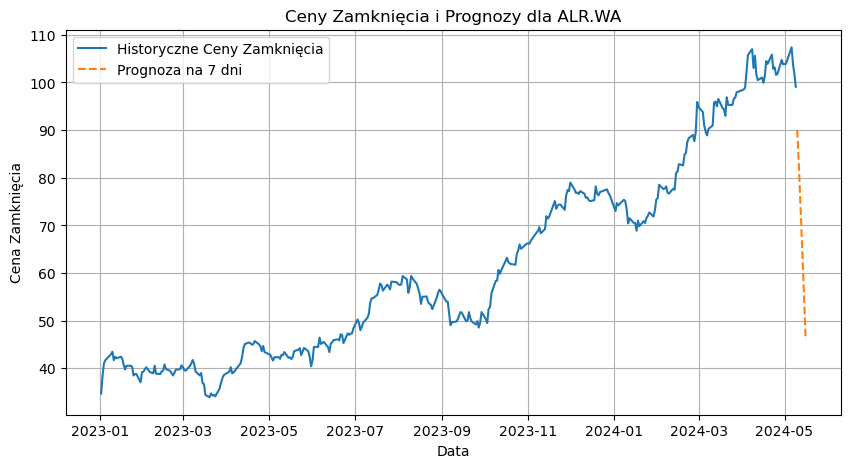

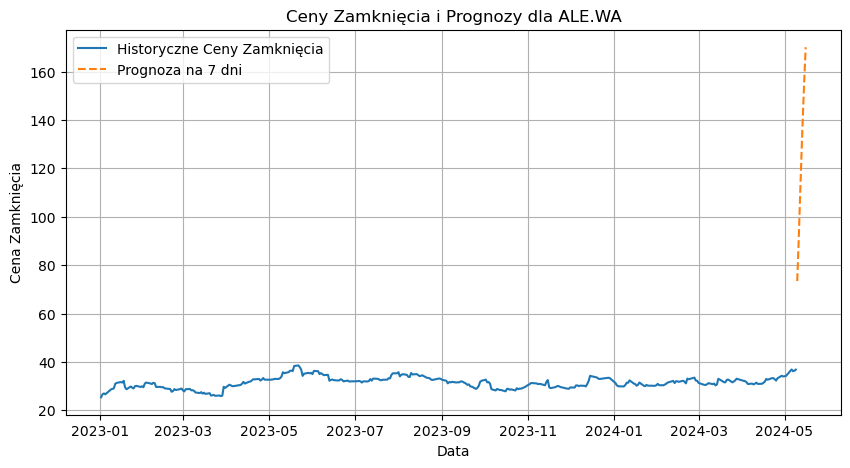

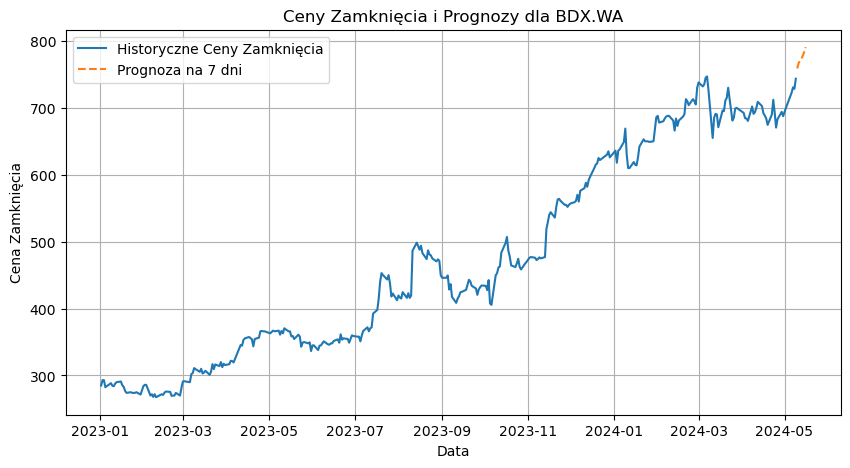

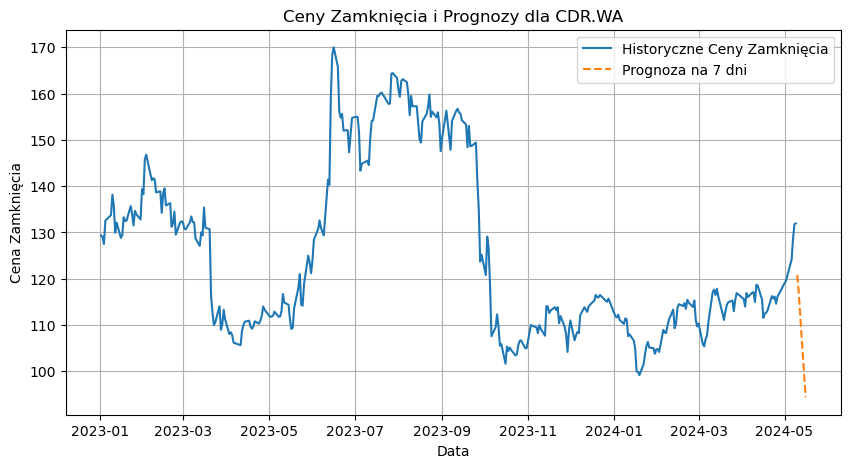

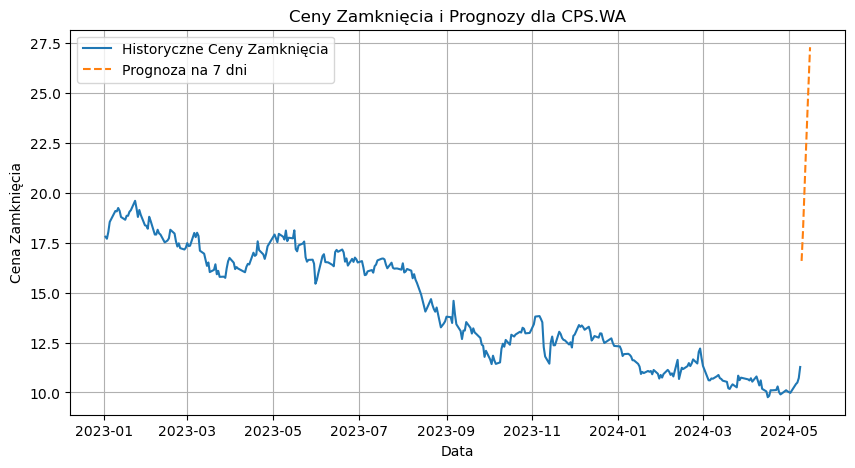

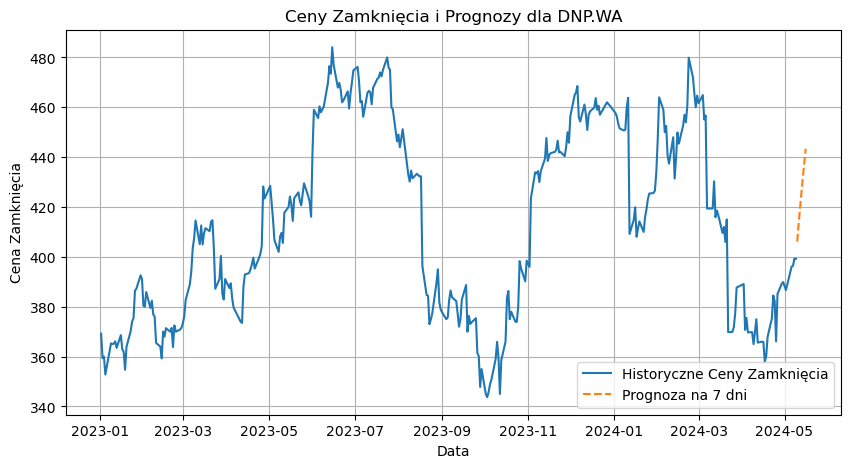

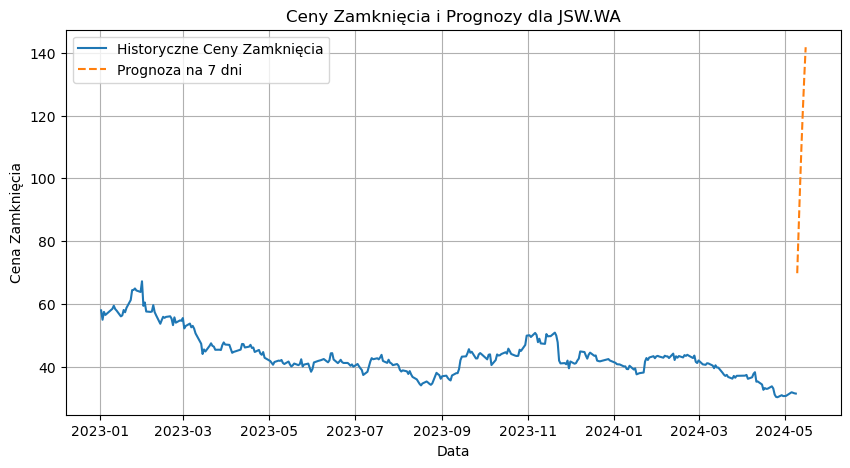

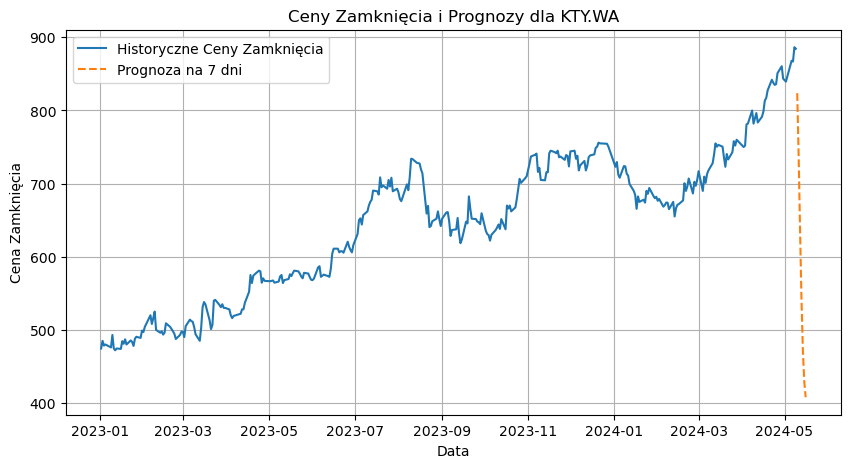

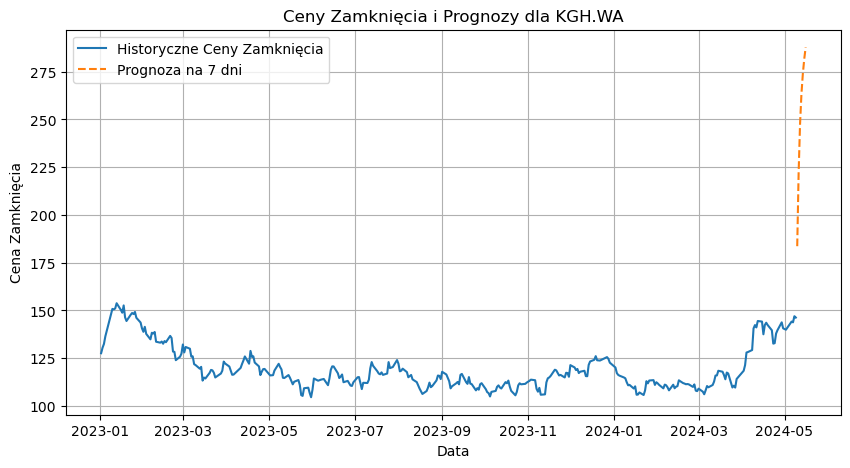

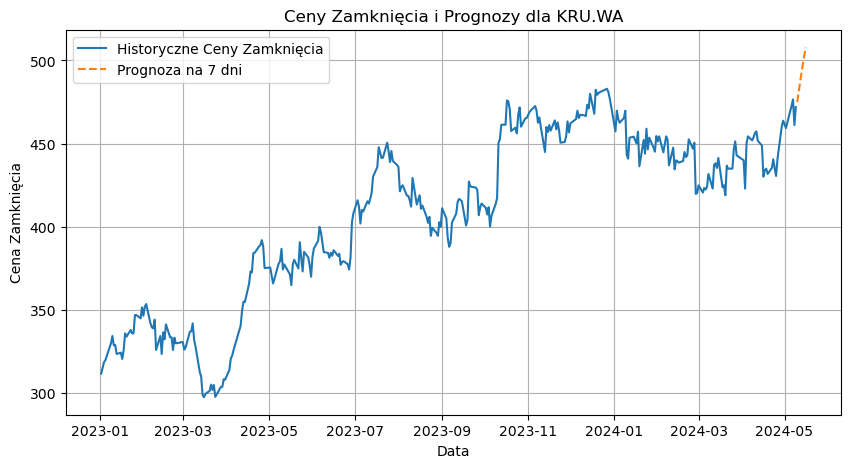

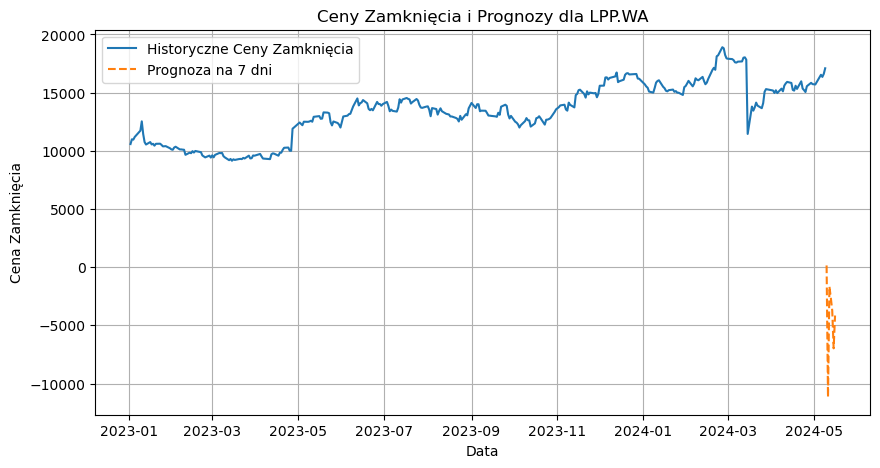

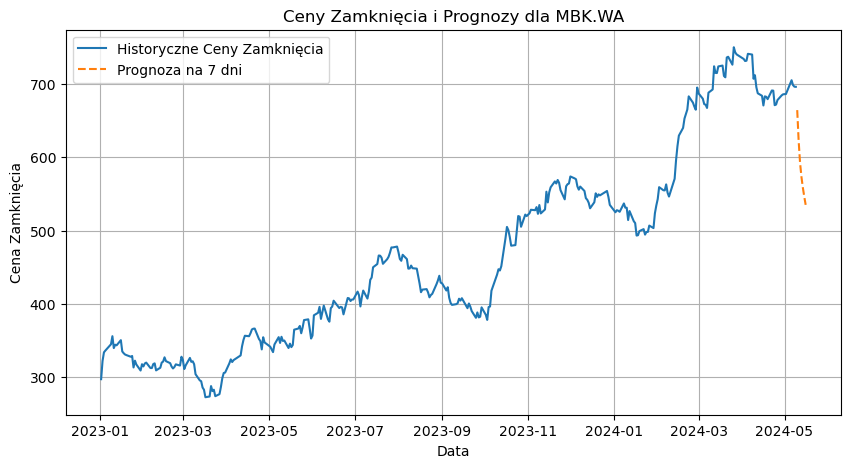

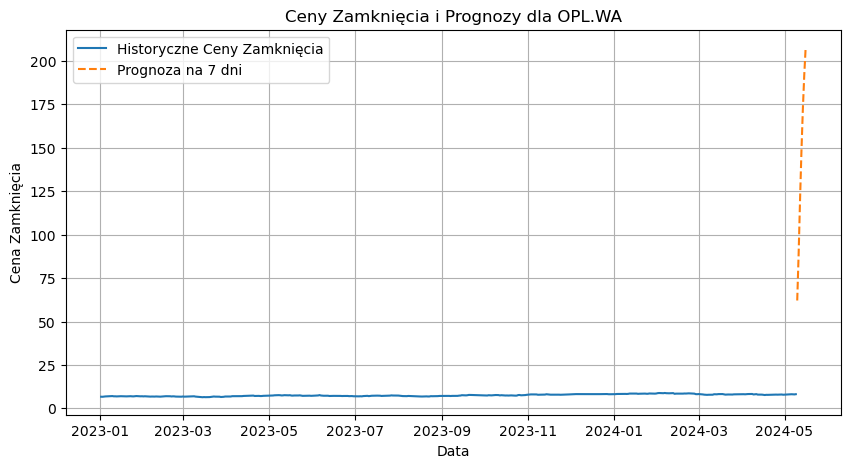

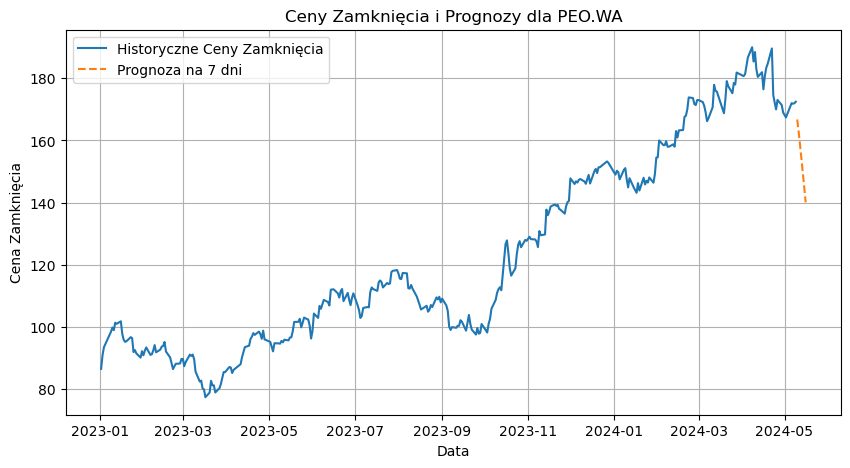

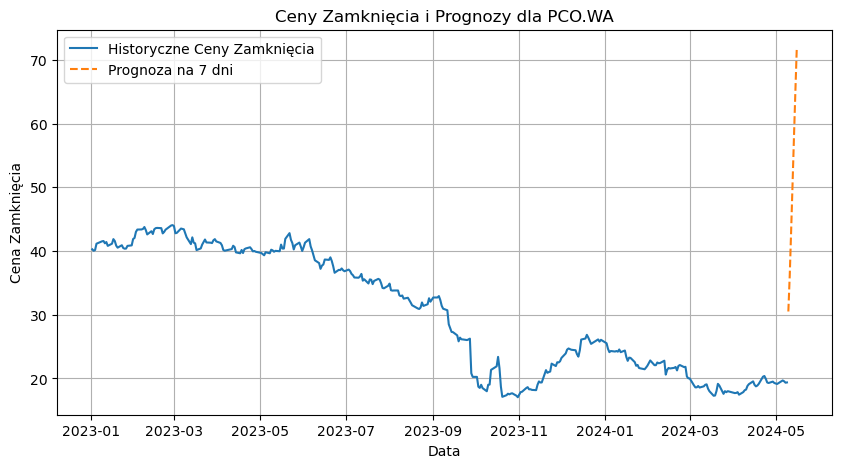

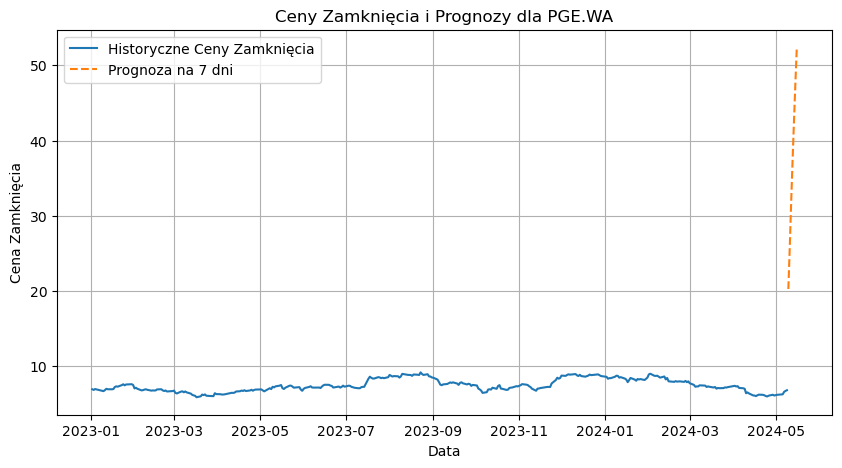

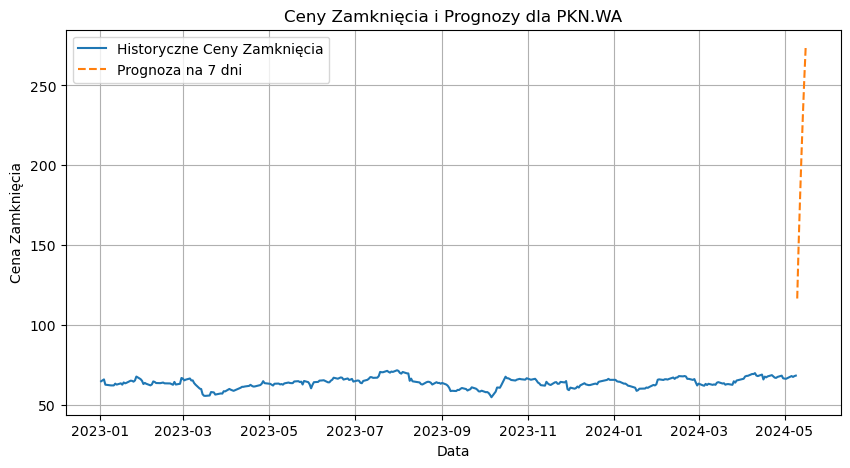

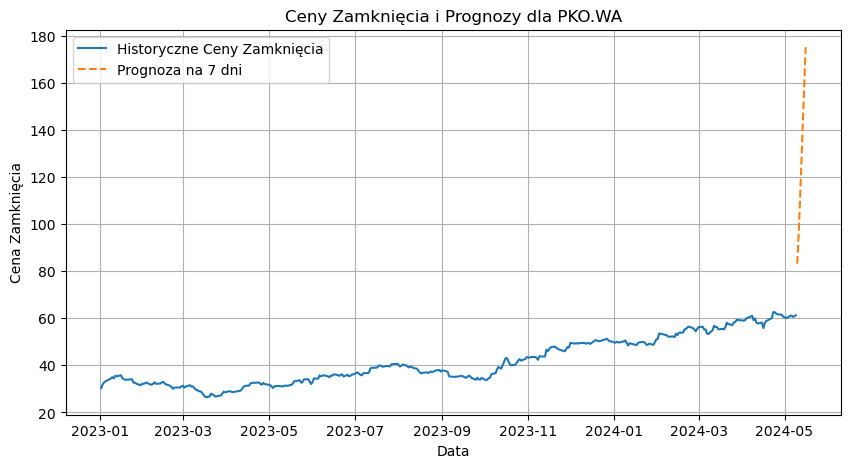

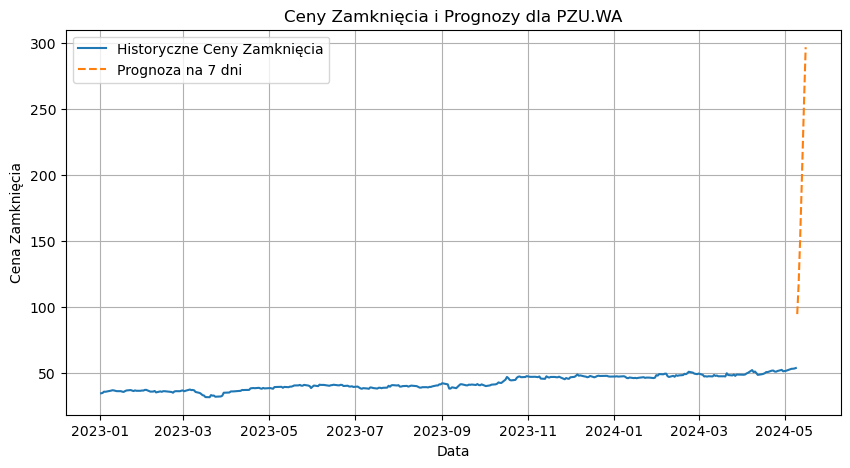

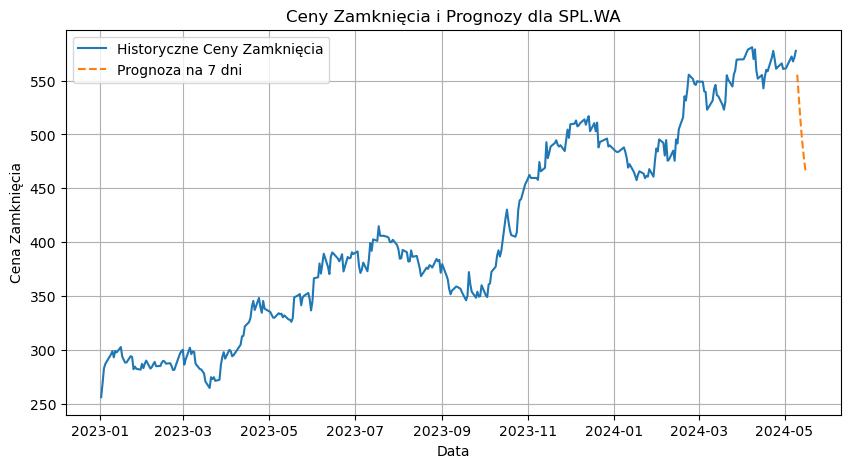

In [16]:
import matplotlib.pyplot as plt

# Zakładamy, że `df` to Twój DataFrame z danymi historycznymi, a `predictions_df` zawiera prognozy
# Zakładamy również, że `df` zawiera indeks daty

# Tworzenie wykresów dla każdej spółki
for symbol in predictions_df.columns:
    plt.figure(figsize=(10, 5))  # Ustawianie rozmiaru figury
    # Rysowanie danych historycznych
    plt.plot(df.index, df[symbol], label='Historyczne Ceny Zamknięcia')
    # Rysowanie prognozy
    plt.plot(predictions_df.index, predictions_df[symbol], label='Prognoza na 7 dni', linestyle='--')
    
    # Dodanie tytułu i legendy
    plt.title(f'Ceny Zamknięcia i Prognozy dla {symbol}')
    plt.xlabel('Data')
    plt.ylabel('Cena Zamknięcia')
    plt.legend()
    plt.grid(True)
    
    # Pokazanie wykresu
    plt.show()


In [18]:
predictions_df

ALR.WA      ALE.WA      BDX.WA      CDR.WA      CPS.WA  \
2024-05-10  170.093948  116.370926  761.218750  118.142387  164.915527   
2024-05-11  185.844894  168.611984  777.520691  115.471703  181.861084   
2024-05-12  199.218536  218.878922  794.696594  113.031303  195.569931   
2024-05-13  210.330948  264.272827  813.151489  110.469673  206.720200   
2024-05-14  219.310974  303.484497  833.084656  107.702042  215.755844   
2024-05-15  226.511627  335.917786  855.118958  104.729599  223.360474   
2024-05-16  232.128067  361.792023  879.440369  101.488586  229.891083   

                DNP.WA      JSW.WA      KTY.WA      KGH.WA      KRU.WA  \
2024-05-10  404.365784  172.183350  820.956543  281.434021  468.335083   
2024-05-11  408.331818  187.176636  769.595032  345.760498  470.854370   
2024-05-12  412.142120  200.140137  704.077454  393.285858  473.700470   
2024-05-13  415.946411  211.537781  631.742432  429.316132  476.682709   
2024-05-14  419.685120  221.512192  557.331970  456.588074  479.770599   
2024-05-15  423.279999  230.293854  485.272552  476.178314  482.895355   
2024-05-16  426.665527  237.914047  420.748688  489.260437  485.965973   

                  LPP.WA      MBK.WA      OPL.WA      PEO.WA     PCO.WA  \
2024-05-10  19127.236328  661.231201   67.458572  191.132278  37.148609   
2024-05-11  20228.142578  642.799683   99.015205  195.407990  45.895252   
2024-05-12  25305.078125  623.614441  128.535568  199.513321  55.547184   
2024-05-13  31500.775391  603.955322  154.950531  203.351379  65.877625   
2024-05-14   8151.071777  585.454956  178.029694  206.904343  76.780006   
2024-05-15 -31722.136719  568.233154  197.904846  210.146469  88.102287   
2024-05-16 -60720.167969  551.808167  214.892365  213.085037  99.830215   

                PGE.WA      PKN.WA      PKO.WA      PZU.WA      SPL.WA  
2024-05-10   43.521545  119.206032  122.659271   73.865791  570.656128  
2024-05-11   55.924812  167.342728  147.178421   81.415550  569.191956  
2024-05-12   67.968781  215.786392  170.893982   89.407051  567.165588  
2024-05-13   79.837471  262.300995  192.653290   98.173424  564.316772  
2024-05-14   91.523315  305.711548  211.934311  107.921669  561.304138  
2024-05-15  103.025299  345.815643  228.777100  118.153671  558.006104  
2024-05-16  114.385765  381.517395  243.113266  128.677399  554.390381

In [19]:
df

ALR.WA     ALE.WA  BDX.WA      CDR.WA     CPS.WA      DNP.WA  \
Date                                                                           
2023-01-02   34.700001  25.440001   285.0  129.339996  17.799999  369.200012   
2023-01-03   38.389999  26.665001   293.0  129.000000  17.700001  359.399994   
2023-01-04   41.049999  27.000000   293.0  127.500000  18.040001  360.000000   
2023-01-05   41.720001  26.650000   282.5  132.559998  18.540001  352.799988   
2023-01-09   42.950001  28.660000   288.5  133.740005  19.090000  365.299988   
...                ...        ...     ...         ...        ...         ...   
2024-05-02  103.900002  34.200001   700.0  119.550003   9.978000  386.700012   
2024-05-06  107.400002  36.904999   722.5  124.099998  10.420000  396.100006   
2024-05-07  103.849998  36.209999   730.5  128.500000  10.495000  396.399994   
2024-05-08  101.750000  36.415001   728.5  131.800003  10.720000  399.299988   
2024-05-09   99.000000  36.724998   746.5  132.100006  11.270000  397.600006   

               JSW.WA  KTY.WA      KGH.WA      KRU.WA   LPP.WA      MBK.WA  \
Date                                                                         
2023-01-02  57.980000   474.5  127.650002  311.799988  10580.0  297.399994   
2023-01-03  55.000000   485.0  130.500000  315.000000  10990.0  322.200012   
2023-01-04  57.500000   478.5  132.500000  318.600006  10960.0  334.000000   
2023-01-05  56.520000   480.0  136.500000  319.799988  11190.0  336.399994   
2023-01-09  58.080002   476.0  148.100006  330.000000  11730.0  345.000000   
...               ...     ...         ...         ...      ...         ...   
2024-05-02  30.750000   839.5  139.949997  459.399994  15700.0  686.200012   
2024-05-06  31.920000   868.0  144.199997  472.799988  16530.0  705.000000   
2024-05-07  31.740000   867.0  143.800003  476.600006  16350.0  698.400024   
2024-05-08  31.590000   886.5  147.000000  461.200012  16610.0  696.200012   
2024-05-09  31.590000   888.5  146.100006  461.200012  17000.0  697.200012   

            OPL.WA      PEO.WA     PCO.WA  PGE.WA     PKN.WA     PKO.WA  \
Date                                                                      
2023-01-02   6.712   86.519997  40.259998   6.920  64.599998  30.270000   
2023-01-03   6.680   90.900002  40.040001   6.832  65.199997  31.760000   
2023-01-04   6.760   93.480003  40.139999   6.946  65.760002  32.669998   
2023-01-05   6.878   94.480003  41.139999   6.898  62.459999  33.189999   
2023-01-09   7.050   98.459999  41.520000   6.700  62.000000  34.430000   
...            ...         ...        ...     ...        ...        ...   
2024-05-02   7.950  167.399994  19.125000   6.180  66.129997  60.060001   
2024-05-06   8.138  172.000000  19.680000   6.246  67.860001  61.200001   
2024-05-07   8.076  171.800003  19.549999   6.574  67.320000  60.619999   
2024-05-08   8.044  172.000000  19.330000   6.700  67.849998  60.779999   
2024-05-09   8.152  172.399994  19.260000   6.842  68.290001  61.200001   

               PZU.WA      SPL.WA  
Date                               
2023-01-02  34.610001  256.000000  
2023-01-03  34.840000  268.600006  
2023-01-04  35.849998  282.799988  
2023-01-05  35.750000  287.000000  
2023-01-09  36.599998  295.799988  
...               ...         ...  
2024-05-02  51.639999  561.400024  
2024-05-06  53.180000  572.400024  
2024-05-07  53.220001  567.799988  
2024-05-08  53.400002  571.599976  
2024-05-09  53.439999  576.200012  

[339 rows x 20 columns]